<a href="https://colab.research.google.com/github/vladmir-arc/HF-download-accelerate/blob/main/HF_download.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install gradio bypy huggingface_hub aligo

In [ ]:
import os
import shutil
import huggingface_hub as hh
import pandas as pd

In [ ]:
# 需要修改的变量
repo_id = 'truthful_qa'
revision = 'main'  # branch of git, "main" or 'refs/convert/parquet' for dataset
repo_type = "dataset"  # "model" or "dataset"

In [ ]:
def format_size(bytes, precision=2):
    """
    Convert a file size in bytes to a human-readable format like KB, MB, GB, etc.
    Huggingface use 1000 not 1024
    """
    units = ["B", "KB", "MB", "GB", "TB", "PB"]
    size = float(bytes)
    index = 0

    while size >= 1000 and index < len(units) - 1:
        index += 1
        size /= 1000

    return f"{size:.{precision}f} {units[index]}"


def list_repo_files_info(repo_id,token=None, revision='main'):
    data_ls = []
    for file in list(hh.list_files_info(repo_id, revision=revision, repo_type=repo_type)):
        data_ls.append([file.path,format_size(file.size)])
    files = [file[0] for file in data_ls]
    data = pd.DataFrame(data_ls,columns = ['文件名','大小'])
    return data, files

# 模型下载到当前目录下的"./download"目录
def download_file(repo_id,filenames, revision='main'):
    print(filenames)
    repo_name = repo_id.replace("/","---")

    for filename in filenames:
        print(filename)
        out = hh.hf_hub_download(repo_id=repo_id,filename=filename,local_dir=f"./download/{repo_name}", \
                                 local_dir_use_symlinks=False,force_download =True,repo_type=repo_type, revision=revision)
    out_path = f"./download/{repo_name}"
    return out_path

In [ ]:
data, filenames = list_repo_files_info(repo_id)
data

In [ ]:
out_path = download_file(repo_id,filenames)

In [ ]:
try:
  data, filenames = list_repo_files_info(repo_id, revision='refs/convert/parquet')
  out_path = download_file(repo_id,filenames, revision='refs/convert/parquet')
except None:
  print('may not have this branch')

In [ ]:
!ls -l ./download/$repo_id

# 登陆阿里云盘 获得refresh_token
通过chrome浏览器按F12进入控制台，搜索应用，找到本地存储空间，从token拿到refresh_token，保存到笔记本；

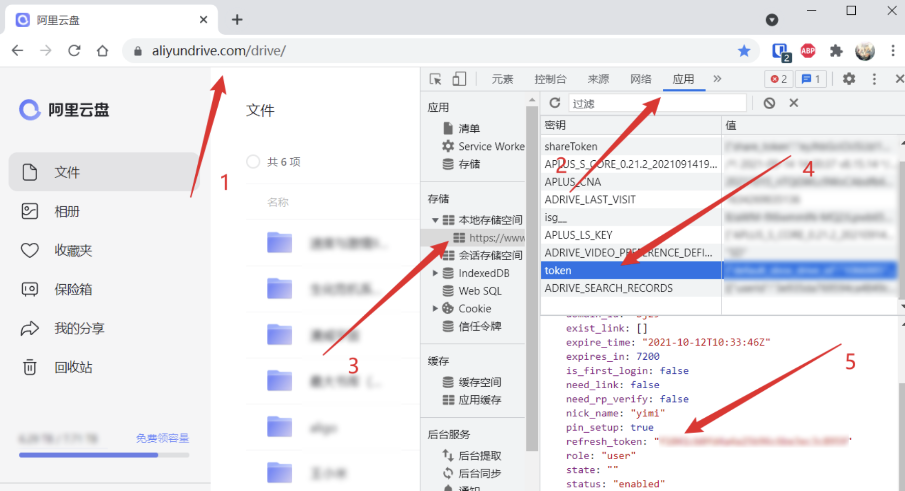

In [ ]:
from aligo import Aligo
refresh_token = ""
ali = Aligo(refresh_token=refresh_token)

In [ ]:
# 在根目录下面先创建一个模型目录
remote_folder = ali.get_folder_by_path('huggingface')
folderdict = remote_folder.to_dict()
file_id = folderdict['file_id']

# 把下载路径上传到指定目录
ali.upload_folder(out_path, parent_file_id=file_id)